In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from astropy import constants as const
from astropy import units as u
from scipy.interpolate import griddata, RegularGridInterpolator
from scipy.integrate import cumtrapz
from tqdm import tqdm

from lmfit import Model
from functions import getGridCell, getVar, remove_disc, calc_streamline

In [2]:
os.chdir('../data/')

rscale = 10.0 * u.AU
mscale = 1. * u.solMass
vscale = np.sqrt(const.G*mscale/rscale)/2.0/np.pi
rhoscale = mscale/rscale**3

i = 30
output = 'data.0140.dbl.h5'

xcell,ycell,zcell = ((getGridCell(filename=output)) * rscale).to(u.cm)

r = np.sqrt(xcell**2+ycell**2.+zcell**2)
th = np.arccos(zcell/r)

DIMT2 = xcell.shape[0]
DIMR2 = xcell.shape[1]

mu = 1.37125

X    = xcell.value
Z    = ycell.value

In [235]:
width = 7.5 #6.974
height = 7. #5.231

titles = ['10 au', '20 au', '30 au', '40au']
fig , ax  = plt.subplots(5, 4, sharex=True, sharey=True, figsize=[width,height])
steps = [792,688,900,500,500,500,500,500,600,600,600,600,600,600,600,600,486,600,600,600]
Rhole = ['10','20','30','40']
Mstar = ['01','03','05','07','10']
Mstarval = [0.1, 0.3, 0.5, 0.7, 1.0]

for l in range(20):
    
    i = np.mod(l,4)
    j = int(l/4)
    
    step = steps[l]
    file_name = 'data.'+str(Mstar[j])+str(Rhole[i])+'.dbl.h5'
    
    xcell,ycell,zcell = (getGridCell(filename=file_name) * rscale).to(u.cm)
    DIMT2 = xcell.shape[0]
    DIMR2 = xcell.shape[1]

    X    = xcell.value
    Z    = ycell.value
    
    rscale = 10.0 * u.AU
    mscale = 1. * u.solMass
    rhoscale = mscale/rscale**3
    print(file_name)

    D    = ((getVar(file_name,step,'rho') * rhoscale).to(u.g/u.cm**3)).value
    Cd   = getVar(file_name,step,'cd')
    
    ax[j][i].set_xlim(0,100)
    ax[j][i].set_ylim(0,100)
    ax[j][i].set_aspect('equal')

    if j==0: ax[j][i].set_title(titles[i])
    if j==4: ax[j][i].set_xlabel('R [AU]')
    if i==0:
        if j==0:
            ax[j][i].set_ylabel('0.1 M$_\odot$ \n Z [AU]')
        elif j==1:
            ax[j][i].set_ylabel('0.3 M$_\odot$ \n Z [AU]')
        elif j==2:
            ax[j][i].set_ylabel('0.5 M$_\odot$ \n Z [AU]')
        elif j==3:
            ax[j][i].set_ylabel('0.7 M$_\odot$ \n Z [AU]')
        else:
            ax[j][i].set_ylabel('1 M$_\odot$ \n Z [AU]')
    valmin = 4
    valmax = 9
    quantity = D

    labelplot = '$\log_{10}(\\rho$) [$10^{-24}$ g cm$^{-3}$]'
    plot = ax[j][i].pcolormesh((X*u.cm).to(u.AU).value, (Z*u.cm).to(u.AU).value, np.log10(quantity*1.e24),
                               vmin=valmin, vmax=valmax, cmap=plt.cm.jet)
    vals = [5.e20,1.e22]
    contours1 = ax[j][i].contour((X*u.cm).to(u.AU).value, (Z*u.cm).to(u.AU).value, Cd, vals, 
                                 linestyles='dashed', colors='red')

    if(i==3 and j==3):
        fig.colorbar(plot, ax=ax, orientation='vertical', label=labelplot)

#fig.set_size_inches(width, height)
plt.savefig('../fig/CompHoles.png',dpi=400)
plt.show()
plt.close(fig)

data.0110.dbl.h5
data.0120.dbl.h5
data.0130.dbl.h5
data.0140.dbl.h5
data.0310.dbl.h5
data.0320.dbl.h5
data.0330.dbl.h5
data.0340.dbl.h5
data.0510.dbl.h5
data.0520.dbl.h5
data.0530.dbl.h5
data.0540.dbl.h5
data.0710.dbl.h5
data.0720.dbl.h5
data.0730.dbl.h5
data.0740.dbl.h5
data.1010.dbl.h5
data.1020.dbl.h5
data.1030.dbl.h5
data.1040.dbl.h5


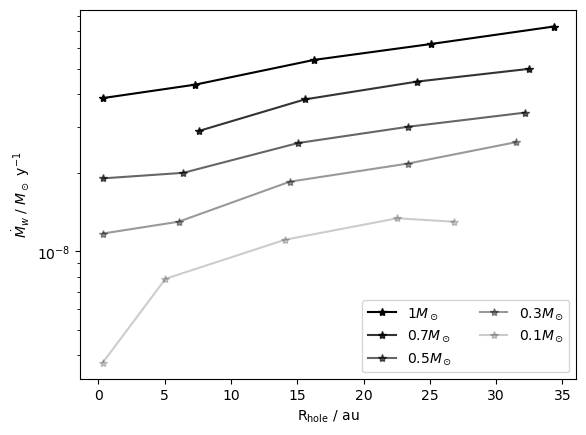

In [227]:
Mdot10 = [3.86446e-08, 4.35e-08, 5.41e-08, 6.22e-08, 7.26e-08]
Rhole10 = [0.333, 7.3, 16.27, 25.058, 34.354]
Mstar10 = [1., 1., 1., 1., 1.]
Mdot07 = [2.89e-08, 3.82e-8, 4.47e-08, 5.e-08]
Rhole07 = [7.55, 15.575, 24.05, 32.5]
Mstar07 = [0.7, 0.7, 0.7, 0.7]
Mdot05 = [1.9046e-08, 2.0e-08, 2.6e-08, 3.0e-08, 3.4e-08]
Rhole05 = [0.333, 6.4, 15.05, 23.34, 32.19]
Mstar05 = [0.5, 0.5, 0.5, 0.5, 0.5]
Mdot03 = [1.17156e-08, 1.30e-08, 1.85e-08, 2.17e-08, 2.62e-08]
Rhole03 = [0.333, 6.05, 14.44, 23.35, 31.5]
Mstar03 = [0.3, 0.3, 0.3, 0.3, 0.3]
Mdot01 = [3.7588e-09, 7.86e-09, 1.11e-08, 1.34e-08, 1.30e-08]
Rhole01 = [0.333, 5.054, 14.1, 22.55, 26.8]
Mstar01 = [0.1, 0.1, 0.1, 0.1, 0.1]
plt.plot(Rhole10, Mdot10, 'k-*', alpha=1., label='$1 M_\odot$')
plt.plot(Rhole07, Mdot07, 'k-*', alpha=0.8, label='$0.7 M_\odot$')
plt.semilogy(Rhole05, Mdot05, 'k-*', alpha=0.6, label='$0.5 M_\odot$')
plt.plot(Rhole03, Mdot03, 'k-*', alpha=0.4, label='$0.3 M_\odot$')
plt.plot(Rhole01, Mdot01, 'k-*', alpha=0.2, label='$0.1 M_\odot$')
plt.ylabel(r'$\dot{M}_w$ / $M_\odot$ y$^{-1}$')
plt.xlabel(r'R$_\mathrm{hole}$ / au')
plt.legend(ncols=2)
plt.savefig('../fig/Mdot.png',dpi=400)

Find a best fit for the $R_{hole}$-$\dot{M}$-$M_\star$ relation 

In [228]:
Rhole = np.concatenate((Rhole01,Rhole03,Rhole05,Rhole07,Rhole10))
Macc = np.concatenate((Mdot01,Mdot03,Mdot05,Mdot07,Mdot10))
Mstar = np.concatenate((Mstar01,Mstar03,Mstar05,Mstar07,Mstar10))

Find a solution for the matrix equation $B = A x$, where $A$

In [229]:
A = np.column_stack([np.ones(len(Rhole)), Rhole, Rhole**2, Mstar])
#A = np.column_stack([np.ones(len(Rhole)), Rhole, Mstar])
B = Macc

In [230]:
result, _, _, _ = np.linalg.lstsq(A, B)
a, b, c, d = result
#a, b, c = result

/var/folders/zc/y003zj4j3r9234xrflkf78040000gn/T/ipykernel_64370/1998193917.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  result, _, _, _ = np.linalg.lstsq(A, B)


(1e-09, 7.621079772044477e-08)

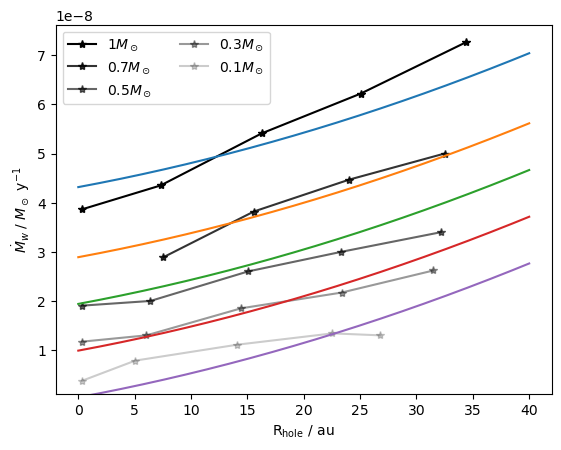

In [231]:
plt.plot(Rhole10, Mdot10, 'k-*', alpha=1., label='$1 M_\odot$')
plt.plot(Rhole07, Mdot07, 'k-*', alpha=0.8, label='$0.7 M_\odot$')
plt.plot(Rhole05, Mdot05, 'k-*', alpha=0.6, label='$0.5 M_\odot$')
plt.plot(Rhole03, Mdot03, 'k-*', alpha=0.4, label='$0.3 M_\odot$')
plt.plot(Rhole01, Mdot01, 'k-*', alpha=0.2, label='$0.1 M_\odot$')
plt.ylabel(r'$\dot{M}_w$ / $M_\odot$ y$^{-1}$')
plt.xlabel(r'R$_\mathrm{hole}$ / au')
plt.legend(ncols=2)
Rhole_test = np.linspace(0,40,4000)
def func(x,y,a,b,c,d):
    return a+b*x+c*x**2+d*y
    
plt.plot(Rhole_test, func(Rhole_test,1.0,a,b,c,d))
plt.plot(Rhole_test, func(Rhole_test,0.7,a,b,c,d))
plt.plot(Rhole_test, func(Rhole_test,0.5,a,b,c,d))
plt.plot(Rhole_test, func(Rhole_test,0.3,a,b,c,d))
plt.plot(Rhole_test, func(Rhole_test,0.1,a,b,c,d))
plt.ylim(1e-9,)

In [184]:
z20 = [-0.00147428, 0.0074709, 0.00176954, -0.06103521, 0.0529027, 0.17594688, -0.21631047, -0.23333117, 0.28353043, 0.17777119, -0.03831321, 0.1080626, 0.29811766]
p20 = np.poly1d(z20)
z30 = [-8.82117638e-05, -4.93948478e-04, 9.37873211e-04, 8.32893188e-03, -6.82945058e-04, -5.20226844e-02, -2.39624928e-02, 1.45206850e-01, 9.28245270e-02, -1.74726748e-01, -3.42458926e-02, 2.61308826e-01, 3.04312644e-01]
p30 = np.poly1d(z30)
z40 = [-0.0160494, 0.08955361, -0.08989748, -0.2819512, 0.54463909, 0.00277206, -0.33040181, -0.0309488, 0.10030042, 0.2436827, 0.30741618]
p40 = np.poly1d(z40)
z0110 = [-0.00641886, -0.01949706, 0.06014428, 0.04040943, -0.07507316, 0.26529388, 0.48140201]
p0110 = np.poly1d(z0110)
z0310 = [0.02898162, -0.2144022,   0.58165412, -0.70519699,  0.38142249, -0.03070821,
 -0.2787914,   0.44221156, -0.25729267,  0.15366341,  0.64412361]
p0310 = np.poly1d(z0310)
z0510 = [0.02352367, -0.14262133,  0.26381686, -0.03223067, -0.38926988,  0.37434848,
 -0.03486434, -0.18142384,  0.13858584,  0.18161634,  0.50559741]
p0510 = np.poly1d(z0510)
z0710 = [-0.00186659,  0.00673072,  0.0012756,  -0.02984984,  0.03772909,  0.0197155,
 -0.0945468,   0.01782196,  0.11167986,  0.22477989,  0.23791463]
p0710 = np.poly1d(z0710)
z1010 = [0.01111745, -0.11021698,  0.39795277, -0.53260963, -0.21887172,  1.1843115,
 -0.60233224, -0.59017236,  0.44607202,  0.01775601,  0.00538026,  0.22216326,
  0.20848224]
p1010 = np.poly1d(z1010)
z0520 = [1.29640868e-05, -1.00112498e-04, -1.52672730e-03, -1.23076304e-03, 1.49387283e-02, 8.64945593e-03, -2.12455848e-02, 1.72942284e-01, 5.31769609e-01]
p0520 = np.poly1d(z0520)
z0530 = [0.00130082, -0.00374681, -0.01824803, 0.05000818, 0.07683968, -0.23068038, -0.06146202, 0.5492634, 0.45119352]
p0530 = np.poly1d(z0530)
z0540 = [-8.68130314e-05, -7.46487774e-03, 2.20039943e-02, 3.78138384e-02, -1.09131154e-01, -1.36883159e-01, 2.31848880e-01, 4.61017898e-01, 3.39575183e-01]
p0540 = np.poly1d(z0540)
zderfull = [-0.06537168, 0.25871369, 0.10845175, -1.46306824, 0.82041621, 2.6095163, -2.30166334, -1.13951547, 1.62212971, -1.08236798, 0.01722601]
pderfull = np.poly1d(z)

/var/folders/zc/y003zj4j3r9234xrflkf78040000gn/T/ipykernel_4476/3320978179.py:6: RuntimeWarning: divide by zero encountered in log10
  plt.plot(r, p0110(np.log10(r)), 'r--')
/var/folders/zc/y003zj4j3r9234xrflkf78040000gn/T/ipykernel_4476/3320978179.py:7: RuntimeWarning: divide by zero encountered in log10
  plt.plot(r, p0310(np.log10(r)), 'r--')
/var/folders/zc/y003zj4j3r9234xrflkf78040000gn/T/ipykernel_4476/3320978179.py:8: RuntimeWarning: divide by zero encountered in log10
  plt.plot(r, p0510(np.log10(r)), 'k--')
/var/folders/zc/y003zj4j3r9234xrflkf78040000gn/T/ipykernel_4476/3320978179.py:9: RuntimeWarning: divide by zero encountered in log10
  plt.plot(r, p0710(np.log10(r)), 'b--')
/var/folders/zc/y003zj4j3r9234xrflkf78040000gn/T/ipykernel_4476/3320978179.py:10: RuntimeWarning: divide by zero encountered in log10
  plt.plot(r, p1010(np.log10(r)), 'g--')


(0.0, 1.0)

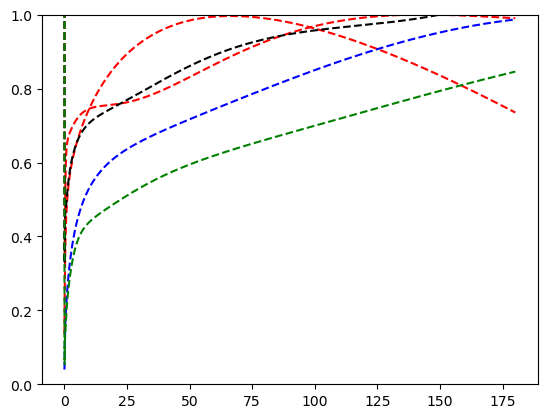

In [557]:
r = np.linspace(0,180,4000)
#plt.plot(r, p(np.log10(r)), 'b--')
#plt.plot(r, p20(np.log10(r)), 'r--')
#plt.plot(r, p30(np.log10(r)), 'g--')
#plt.plot(r, p40(np.log10(r)), 'c--')
plt.plot(r, p0110(np.log10(r)), 'r--')
plt.plot(r, p0310(np.log10(r)), 'r--')
plt.plot(r, p0510(np.log10(r)), 'k--')
plt.plot(r, p0710(np.log10(r)), 'b--')
plt.plot(r, p1010(np.log10(r)), 'g--')
#plt.plot(r, p0520(np.log10(r)), 'k-.')
#plt.plot(r, p0530(np.log10(r)), 'r-.')
#plt.plot(r, p0540(np.log10(r)), 'k-')
plt.ylim(0,1)

In [558]:
#pd10 = np.polyder(p)
pd20 = np.polyder(p20)
pd30 = np.polyder(p30)
pd40 = np.polyder(p40)
pd0110 = np.polyder(p0110)
pd0310 = np.polyder(p0310)
pd0510 = np.polyder(p0510)
pd0710 = np.polyder(p0710)
pd1010 = np.polyder(p1010)
pd0520 = np.polyder(p0520)
pd0530 = np.polyder(p0530)
pd0540 = np.polyder(p0540)

/var/folders/zc/y003zj4j3r9234xrflkf78040000gn/T/ipykernel_4476/478160192.py:6: RuntimeWarning: divide by zero encountered in log10
  plt.plot(np.log10(r), np.log10(pd0110(np.log10(r))*np.exp(-(r/120.)**10)), 'v--', label='01_10')
/var/folders/zc/y003zj4j3r9234xrflkf78040000gn/T/ipykernel_4476/478160192.py:6: RuntimeWarning: invalid value encountered in log10
  plt.plot(np.log10(r), np.log10(pd0110(np.log10(r))*np.exp(-(r/120.)**10)), 'v--', label='01_10')
/var/folders/zc/y003zj4j3r9234xrflkf78040000gn/T/ipykernel_4476/478160192.py:7: RuntimeWarning: divide by zero encountered in log10
  plt.plot(np.log10(r), np.log10(pd0310(np.log10(r))*np.exp(-(r/120.)**10)), 'r--', label='03_10')
/var/folders/zc/y003zj4j3r9234xrflkf78040000gn/T/ipykernel_4476/478160192.py:7: RuntimeWarning: invalid value encountered in log10
  plt.plot(np.log10(r), np.log10(pd0310(np.log10(r))*np.exp(-(r/120.)**10)), 'r--', label='03_10')
/var/folders/zc/y003zj4j3r9234xrflkf78040000gn/T/ipykernel_4476/478160192.py:8

(-3.0, 2.0)

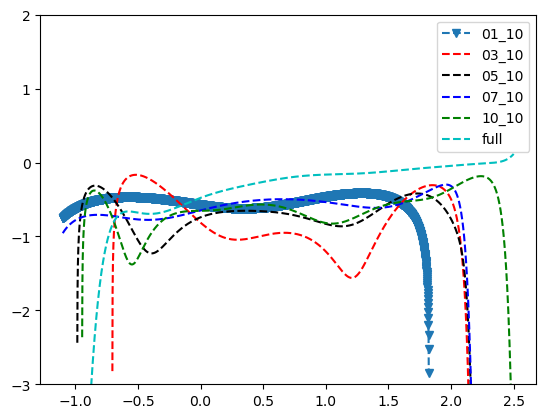

In [560]:
r = np.logspace(-1.1,2.5,4000)
#plt.plot(r, pd10(np.log10(r)), 'b--', label='10')
#plt.plot(r, pd20(np.log10(r)), 'r--', label='20')
#plt.plot(r, pd30(np.log10(r)), 'g--', label='30')
#plt.loglog(r, pd40(np.log10(r)), 'c--', label='40')
plt.plot(np.log10(r), np.log10(pd0110(np.log10(r))*np.exp(-(r/120.)**10)), 'v--', label='01_10')
plt.plot(np.log10(r), np.log10(pd0310(np.log10(r))*np.exp(-(r/120.)**10)), 'r--', label='03_10')
plt.plot(np.log10(r), np.log10(pd0510(np.log10(r))*np.exp(-(r/120.)**10)), 'k--', label='05_10')
plt.plot(np.log10(r), np.log10(pd0710(np.log10(r))*np.exp(-(r/120.)**10)), 'b--', label='07_10')
plt.plot(np.log10(r), np.log10(pd1010(np.log10(r))*np.exp(-(r/250.)**10)), 'g--', label='10_10')
plt.plot(np.log10(r), pderfull(np.log10(r)), 'c--', label='full')
#plt.plot(r, pd0520(np.log10(r)), 'k-.', label='05_20')
#plt.plot(r, pd0530(np.log10(r)), 'k-.', label='05_30')
#plt.plot(r, pd0540(np.log10(r)), 'k-', label='05_40')
plt.legend()
#plt.xlim(1.e-2,300)
plt.ylim(-3,2)

[-0.03424805  0.27683746 -0.67825911  0.08382179  1.58472963 -0.96290461
 -1.3324724   0.67991858  0.84391181 -0.8797764  -7.71660249]


/var/folders/zc/y003zj4j3r9234xrflkf78040000gn/T/ipykernel_64370/3807240662.py:19: RuntimeWarning: invalid value encountered in log10
  plt.plot(np.log10(grad05["x"]), np.log10(grad05["y"]), 'r*')


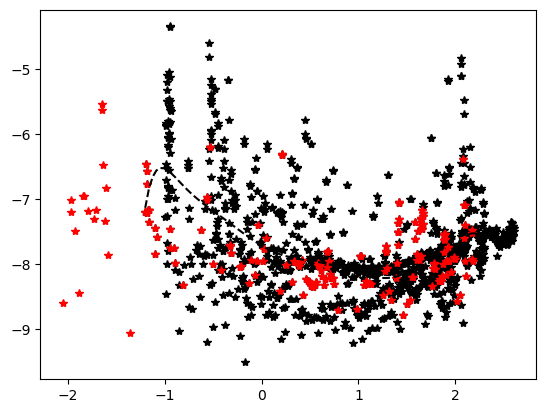

In [234]:
grad01 = np.load("grad01.npz")
grad03 = np.load("grad03.npz")
grad05 = np.load("grad05.npz")
grad07 = np.load("grad07.npz")
grad10 = np.load("grad10.npz")

x = np.concatenate((grad01["x"],grad03["x"],grad05["x"],grad07["x"],grad10["x"]),axis=None)
y = np.concatenate((grad01["y"],grad03["y"],grad05["y"],grad07["y"],grad10["y"]),axis=None)
data = np.column_stack((x, y))
d = data[data[:,0].argsort()]
d = d[(d[:,0] >= 5e-2)]
d = d[(d[:,1] >= 0)]
n = 1

xavg = np.mean(d[:,0].reshape(-1, n), axis=1)
yavg = np.mean(d[:,1].reshape(-1, n), axis=1)
davg = np.column_stack((xavg, yavg))
plt.plot(np.log10(davg[:,0]), np.log10(davg[:,1]), 'k*')
plt.plot(np.log10(grad05["x"]), np.log10(grad05["y"]), 'r*')
z = np.polyfit(np.log10(davg[:,0]), np.log10(davg[:,1]), 10)
p = np.poly1d(z)
x1 = np.logspace(np.log10(davg[0,0]), np.log10(davg[-1,0]), 100)
plt.plot(np.log10(x1), p(np.log10(x1)), 'k--')
print(z)

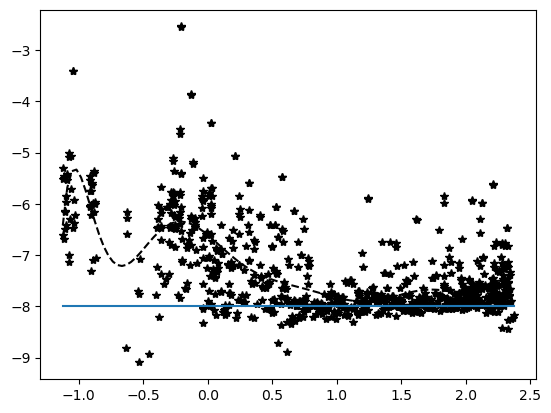

In [5]:
grad10 = np.load("grad07.npz")
#plt.semilogy(grad03["x"], grad03["y"], 'b*')
grad20 = np.load("grad0720.npz")
#plt.semilogy(grad05["x"], grad05["y"], 'g*')
grad30 = np.load("grad0730.npz")
#plt.semilogy(grad07["x"], grad07["y"], 'k*')
grad40 = np.load("grad0740.npz")
#plt.loglog(grad10["x"], grad10["y"], 'r*')
#plt.xlim(1e-2,4e2)
x = np.concatenate((grad10["x"],grad20["x"],grad30["x"],grad40["x"]),axis=None)
y = np.concatenate((grad10["y"],grad20["y"],grad30["y"],grad40["y"]),axis=None)
data = np.column_stack((x, y))
d = data[data[:,0].argsort()]
d = d[(d[:,0] >= 5e-3)]
d = d[(d[:,1] >= 0)]
n = 1
#last = np.empty(shape=(1, 2), dtype='float')
#last[0,0] = 200.
#last[0,1] = 10.
#d = np.append(d, last, axis=0)
xavg = np.mean(d[:,0].reshape(-1, n), axis=1)
yavg = np.mean(d[:,1].reshape(-1, n), axis=1)
davg = np.column_stack((xavg, yavg))
plt.plot(np.log10(davg[:,0]), np.log10(davg[:,1]), 'k*')
#plt.plot(np.log10(grad10["x"]), np.log10(grad10["y"]), 'g*')
#plt.plot(np.log10(grad30["x"]), np.log10(grad30["y"]), 'r*')
#plt.plot(np.log10(grad40["x"]), np.log10(grad40["y"]), 'b*')
z = np.polyfit(np.log10(davg[:,0]), np.log10(davg[:,1]), 10)
p = np.poly1d(z)
x1 = np.logspace(np.log10(davg[0,0]), np.log10(davg[-1,0]), 100)
plt.plot(np.log10(x1), p(np.log10(x1)), 'k--')
plt.plot(np.log10(x1), np.log10(10**-(8)*x1**0.))

(323, 2)
[-0.32993391]
[ 0.25215106 -0.53650007]
[-0.03426554  0.30580248 -0.52162442]
[-0.02274201  0.00937641  0.32145608 -0.54015219]


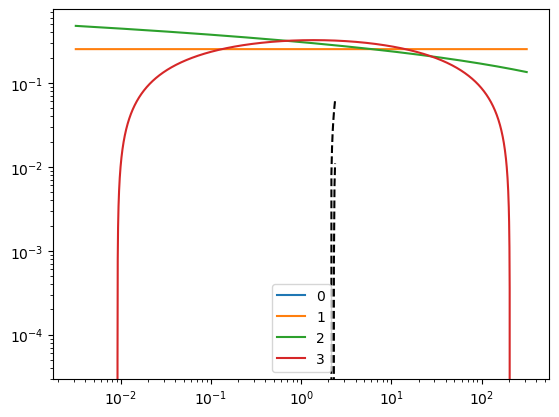

In [6]:
cum0710 = np.load("data0710.npy")
cum0720 = np.load("data0720.npy")
cum0730 = np.load("data0730.npy")
cum0740 = np.load("data0740.npy")
print(np.shape(cum0710))
x = np.concatenate((cum0710[:,0],cum0720[:,0],cum0730[:,0],cum0740[:,0]),axis=None)
y = np.concatenate((cum0710[:,1],cum0720[:,1],cum0730[:,1],cum0740[:,1]),axis=None)
data = np.column_stack((x, y))
d = data[data[:,0].argsort()]
d = d[(d[:,0] >= 1e-2)]
#d = d[(d[:,1] >= 0)]
n = 1
#last = np.empty(shape=(1, 2), dtype='float')
#last[0,0] = 200.
#last[0,1] = 10.
#d = np.append(d, last, axis=0)
xavg = np.mean(d[:,0].reshape(-1, n), axis=1)
yavg = np.mean(d[:,1].reshape(-1, n), axis=1)
davg = np.column_stack((xavg, yavg))
#plt.plot(np.log10(davg[:,0]), np.log10(davg[:,1]), 'k*')
#plt.plot(np.log10(grad10["x"]), np.log10(grad10["y"]), 'g*')
#plt.plot(np.log10(grad30["x"]), np.log10(grad30["y"]), 'r*')
#plt.plot(np.log10(grad40["x"]), np.log10(grad40["y"]), 'b*')
for nf in range(4):
    z = np.polyfit(np.log10(davg[:,0]), np.log10(davg[:,1]), nf)
    p = np.poly1d(z)
    x1 = np.logspace(np.log10(davg[0,0]), np.log10(davg[-1,0]), 100)
    x = np.logspace(-2.5,2.5,4000)
    pd = np.polyder(p)
    plt.loglog(x,pd(np.log10(x)),label=str(nf))
    plt.plot(np.log10(x1), p(np.log10(x1)), 'k--')
    print(z)
plt.legend()

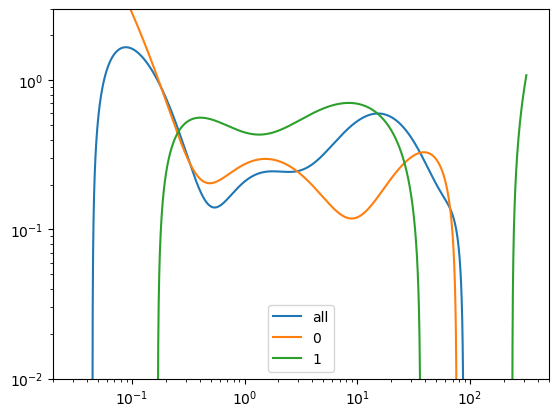

In [76]:
cum10 = np.load("data0110.npy")
cum20 = np.load("data0120.npy")
cum30 = np.load("data0130.npy")
cum40 = np.load("data0140.npy")

x = np.concatenate((cum10[:,0],cum20[:,0],cum30[:,0],cum40[:,0]),axis=None)
y = np.concatenate((cum10[:,1],cum20[:,1],cum30[:,1],cum40[:,1]),axis=None)
data = np.column_stack((x, y))
d = data[data[:,0].argsort()]
d = d[(d[:,0] >= 8e-3)]
d = d[(d[:,1] >= 0)]
n = 1
xavg = np.mean(d[:,0].reshape(-1, n), axis=1)
yavg = np.mean(d[:,1].reshape(-1, n), axis=1)
davg = np.column_stack((xavg, yavg))
for nf in [10]:
    z = np.polyfit(np.log10(davg[:,0]), np.log10(davg[:,1]), nf)
    p = np.poly1d(z)
    x = np.logspace(-1.5,2.5,4000)
    pd = np.polyder(p)
    plt.loglog(x,pd(np.log10(x)),label='all')

data = [cum10, cum20, cum30, cum40]
for k in range(2):
    z = np.polyfit(np.log10(data[k][:,0]), np.log10(data[k][:,1]), 6)
    p = np.poly1d(z)
    x = np.logspace(-1.5,2.5,4000)
    pd = np.polyder(p)
    plt.loglog(x,pd(np.log10(x)),label=str(k))
#plt.loglog(x, 4e-1*(x)**-0.21)
#plt.loglog(x, 4e-1*(x)**-0.2)
#plt.loglog(x, 4e-1*(x)**-0.22)
plt.ylim(1e-2,3)
plt.legend()

In [43]:
cum10 = np.load("data0310.npy")
cum20 = np.load("data0320.npy")
cum30 = np.load("data0330.npy")
cum40 = np.load("data0340.npy")

x = np.concatenate((cum10[:,0],cum20[:,0],cum30[:,0],cum40[:,0]),axis=None)
y = np.concatenate((cum10[:,1],cum20[:,1],cum30[:,1],cum40[:,1]),axis=None)
data = np.column_stack((x, y))
d = data[data[:,0].argsort()]
d = d[(d[:,0] >= 8e-3)]
d = d[(d[:,1] >= 0)]
n = 1
xavg = np.mean(d[:,0].reshape(-1, n), axis=1)
yavg = np.mean(d[:,1].reshape(-1, n), axis=1)
davg = np.column_stack((xavg, yavg))
for nf in [10]:
    z = np.polyfit(np.log10(davg[:,0]), np.log10(davg[:,1]), nf)
    p = np.poly1d(z)
    x = np.logspace(-1.5,2.5,4000)
    pd = np.polyder(p)
    plt.loglog(x,pd(np.log10(x)),label='all')

data = [cum10, cum20, cum30, cum40]
for k in range(4):
    z = np.polyfit(np.log10(data[k][:,0]), np.log10(data[k][:,1]), 8)
    p = np.poly1d(z)
    x = np.logspace(-1.5,2.5,4000)
    pd = np.polyder(p)
    plt.loglog(x,pd(np.log10(x)),label=str(k))
#plt.loglog(x, 4e-1*(x)**-0.21)
#plt.loglog(x, 4e-1*(x)**-0.2)
#plt.loglog(x, 4e-1*(x)**-0.22)
plt.ylim(1e-2,3)
plt.legend()

FileNotFoundError: [Errno 2] No such file or directory: 'data0310.npy'

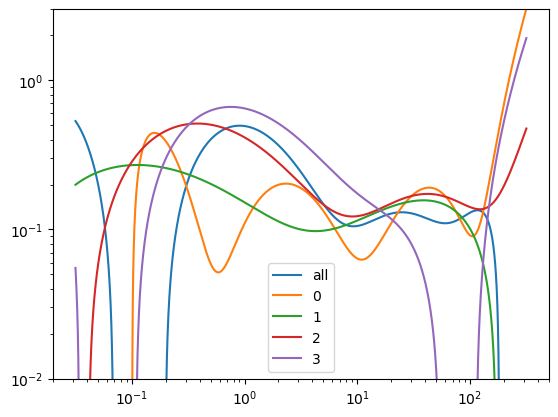

In [38]:
cum10 = np.load("data0510.npy")
cum20 = np.load("data0520.npy")
cum30 = np.load("data0530.npy")
cum40 = np.load("data0540.npy")

x = np.concatenate((cum10[:,0],cum20[:,0],cum30[:,0],cum40[:,0]),axis=None)
y = np.concatenate((cum10[:,1],cum20[:,1],cum30[:,1],cum40[:,1]),axis=None)
data = np.column_stack((x, y))
d = data[data[:,0].argsort()]
d = d[(d[:,0] >= 8e-3)]
d = d[(d[:,1] >= 0)]
n = 1
xavg = np.mean(d[:,0].reshape(-1, n), axis=1)
yavg = np.mean(d[:,1].reshape(-1, n), axis=1)
davg = np.column_stack((xavg, yavg))
for nf in [10]:
    z = np.polyfit(np.log10(davg[:,0]), np.log10(davg[:,1]), nf)
    p = np.poly1d(z)
    x = np.logspace(-1.5,2.5,4000)
    pd = np.polyder(p)
    plt.loglog(x,pd(np.log10(x)),label='all')

data = [cum10, cum20, cum30, cum40]
for k in range(4):
    z = np.polyfit(np.log10(data[k][:,0]), np.log10(data[k][:,1]), 8)
    p = np.poly1d(z)
    x = np.logspace(-1.5,2.5,4000)
    pd = np.polyder(p)
    plt.loglog(x,pd(np.log10(x)),label=str(k))
#plt.loglog(x, 4e-1*(x)**-0.21)
#plt.loglog(x, 4e-1*(x)**-0.2)
#plt.loglog(x, 4e-1*(x)**-0.22)
plt.ylim(1e-2,3)
plt.legend()

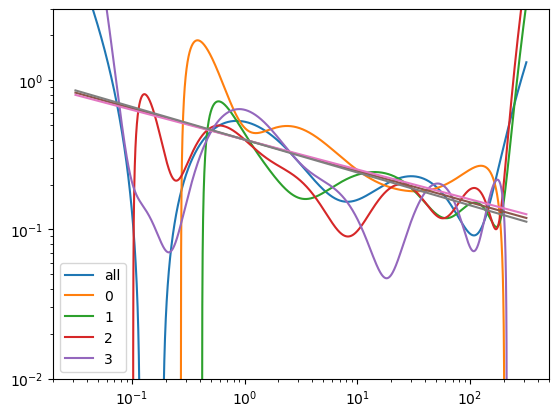

In [7]:
cum0710 = np.load("data0710.npy")
cum0720 = np.load("data0720.npy")
cum0730 = np.load("data0730.npy")
cum0740 = np.load("data0740.npy")

x = np.concatenate((cum0710[:,0],cum0720[:,0],cum0730[:,0],cum0740[:,0]),axis=None)
y = np.concatenate((cum0710[:,1],cum0720[:,1],cum0730[:,1],cum0740[:,1]),axis=None)
data = np.column_stack((x, y))
d = data[data[:,0].argsort()]
d = d[(d[:,0] >= 8e-3)]
d = d[(d[:,1] >= 0)]
n = 1
xavg = np.mean(d[:,0].reshape(-1, n), axis=1)
yavg = np.mean(d[:,1].reshape(-1, n), axis=1)
davg = np.column_stack((xavg, yavg))
for nf in [7]:
    z = np.polyfit(np.log10(davg[:,0]), np.log10(davg[:,1]), nf)
    p = np.poly1d(z)
    x = np.logspace(-1.5,2.5,4000)
    pd = np.polyder(p)
    plt.loglog(x,pd(np.log10(x)),label='all')

xs = [cum0710[:,0], cum0720[:,0], cum0730[:,0], cum0740[:,0]]
ys = [cum0710[:,1], cum0720[:,1], cum0730[:,1], cum0740[:,1]]
ns = [1,1,1,1]
ds = [5e-3, 5e-3, 5e-3, 5e-3]
nfs = [12,12,12,12]
for k in range(4):
    data = np.column_stack((xs[k], ys[k]))
    d = data[data[:,0].argsort()]
    d = d[(d[:,0] >= ds[k])]
    d = d[(d[:,1] >= 0)]
    xavg = np.mean(d[:,0].reshape(-1, ns[k]), axis=1)
    yavg = np.mean(d[:,1].reshape(-1, ns[k]), axis=1)
    davg = np.column_stack((xavg, yavg))
    nf = nfs[k]
    z = np.polyfit(np.log10(davg[:,0]), np.log10(davg[:,1]), nf)
    p = np.poly1d(z)
    x = np.logspace(-1.5,2.5,4000)
    pd = np.polyder(p)
    plt.loglog(x,pd(np.log10(x)),label=str(k))
plt.loglog(x, 4e-1*(x)**-0.21)
plt.loglog(x, 4e-1*(x)**-0.2)
plt.loglog(x, 4e-1*(x)**-0.22)
plt.ylim(1e-2,3)
plt.legend()

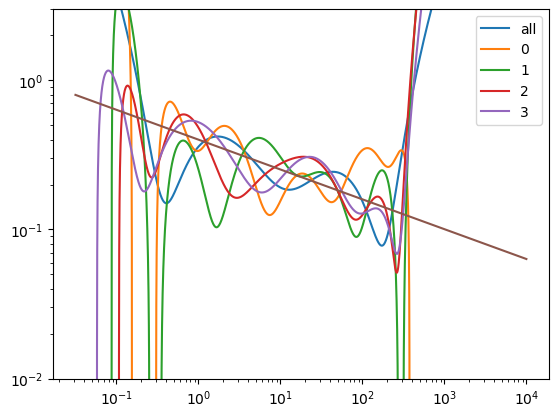

In [31]:
cum1010 = np.load("data1010.npy")
cum1020 = np.load("data1020.npy")
cum1030 = np.load("data1030.npy")
cum1040 = np.load("data1040.npy")

x = np.concatenate((cum1010[:,0],cum1020[:,0],cum1030[:,0],cum1040[:,0]),axis=None)
y = np.concatenate((cum1010[:,1],cum1020[:,1],cum1030[:,1],cum1040[:,1]),axis=None)
data = np.column_stack((x, y))
d = data[data[:,0].argsort()]
d = d[(d[:,0] >= 8e-3)]
d = d[(d[:,1] >= 0)]
n = 1
xavg = np.mean(d[:,0].reshape(-1, n), axis=1)
yavg = np.mean(d[:,1].reshape(-1, n), axis=1)
davg = np.column_stack((xavg, yavg))
for nf in [7]:
    z = np.polyfit(np.log10(davg[:,0]), np.log10(davg[:,1]), nf)
    p = np.poly1d(z)
    x = np.logspace(-1.5,4,4000)
    pd = np.polyder(p)
    plt.loglog(x,pd(np.log10(x)),label='all')

data = [cum1010, cum1020, cum1030, cum1040]
for k in range(4):
    z = np.polyfit(np.log10(data[k][:,0]), np.log10(data[k][:,1]), 12)
    p = np.poly1d(z)
    x = np.logspace(-1.5,4,4000)
    pd = np.polyder(p)
    plt.loglog(x,pd(np.log10(x)),label=str(k))
#plt.loglog(x, 4e-1*(x)**-0.21)
plt.loglog(x, 4e-1*(x)**-0.2)
#plt.loglog(x, 4e-1*(x)**-0.22)
plt.ylim(1e-2,3)
plt.legend()

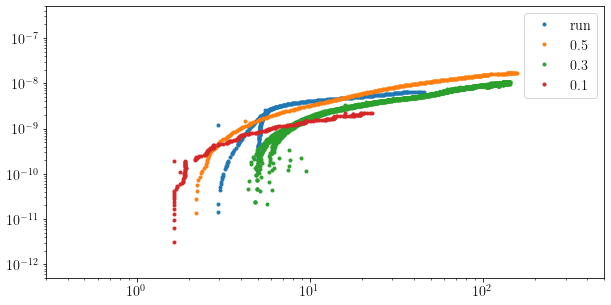

In [40]:
plt.plot(bfg[:,0], bfg[:,1]*(Mdot_cumlative_theta[t-1]*u.g/u.s).to(u.M_sun/u.yr), '.', label='run')
os.chdir('/e/arch/users/picogna/Photoevaporation/Mass/Final/05Msun')
mdot05 = np.loadtxt('cumdot.dat')
plt.plot(mdot05[:,0], mdot05[:,1], '.', label='0.5')
os.chdir('/e/arch/users/picogna/Photoevaporation/Mass/Final/03Msun')
mdot03 = np.loadtxt('cumdot.dat')
plt.plot(mdot03[:,0], mdot03[:,1], '.', label='0.3')
os.chdir('/e/arch/users/picogna/Photoevaporation/Mass/Final/01Msun')
mdot01 = np.loadtxt('cumdot.dat')
plt.plot(mdot01[:,0], mdot01[:,1], '.', label='0.1')
plt.xscale('log')
plt.yscale('log')
plt.xlim(0.3,500)
plt.ylim(5.e-13,5.e-7)
plt.legend()
os.chdir('/e/arch/users/picogna/Photoevaporation/Mass/Final/1Msun')

In [24]:
poly01 = np.polynomial.Polynomial(np.flip([-34.95022853, 270.95446791, -864.45016636, 1451.45652693, -1351.73160253, 662.37915192, -132.87028771]))
poly03 = np.polynomial.Polynomial(np.flip([-5.40686879, 48.39986888, -178.69750435, 348.62167032, -378.98077677, 217.64905984, -50.52363646]))
poly05 = np.polynomial.Polynomial(np.flip([-2.53277294, 26.51494185, -114.45374216, 260.02400251, -326.95039112, 215.73645114, -57.08739783]))
poly07 = np.polynomial.Polynomial(np.flip([-5.08688741, 47.99536144, -189.19642612, 399.32806368, -475.96644449, 303.98286497, -80.61779453]))
poly10 = np.polynomial.Polynomial(np.flip([-3.50021725, 35.99606182, -151.84044169, 336.32666308, -412.52023057, 266.08125315, -70.04518934]))

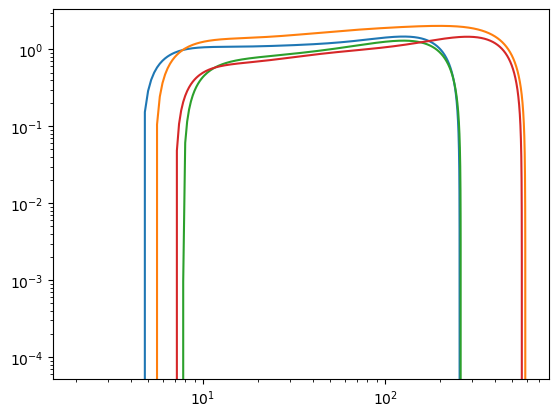

In [25]:
x = np.linspace(2,600,3000)
lx = np.log10(x)
_ = plt.loglog(x,poly03(lx),x,poly05(lx),x,poly07(lx),x,poly10(lx))

In [6]:
10**(-2.0336567252526322E-001)

0.6260864828018721

In [8]:
10**(1.2656206959575655E-001)

1.338326475809929

In [9]:
10**(3.0511057697729810E-001)

2.0188803312223884

In [10]:
10**(3.7102704581799290E-001)

2.349779149487144